In [ ]:
import os     # to implement os related functionality
import tensorflow as tf     # library useful for training deep neural nets
from tensorflow.keras import layers, Model 
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50    # import resnet 50
from tensorflow.keras.models import Sequential
# importing keras layers
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
# Preprocesses a tensor or Numpy array encoding a batch of images.
from tensorflow.keras.applications.resnet50 import preprocess_input
# Generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

In [ ]:
def learning_function(data_dir): 
  base_model = ResNet50(input_shape=(224, 224,3), include_top=False, pooling='max', weights="imagenet")

  for layer in base_model.layers:
    layer.trainable = False

  # Create model
  model = Sequential()

  model.add(base_model)
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))

  # Compile model
  model.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
  model.summary()

  image_size = 224
  # Generates batches of tensor image data with real-time data augmentation. 
  data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                      horizontal_flip=True,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2) # set validation split 20% which we will use as test data

  train_generator = data_generator.flow_from_directory(
                                      data_dir,
                                      target_size=(image_size, image_size),
                                      batch_size=10,
                                      class_mode='binary',
                                      subset='training')
  
  test_generator = data_generator.flow_from_directory(
                                      data_dir,
                                      target_size=(image_size, image_size),
                                      batch_size=1,
                                      class_mode='binary',
                                      subset='validation')
  NUM_EPOCHS = 20
  EARLY_STOP_PATIENCE = 5

  # Early stopping & checkpointing the best model in ../current directory
  # restoring that as our model for prediction
  from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

  early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
  checkpointer = ModelCheckpoint(filepath = 'best.hdf5',
                                  monitor = 'val_loss',
                                  save_best_only = True,
                                  mode = 'auto')
  
  import math
  fit_history = model.fit(train_generator,
                                    steps_per_epoch=None,
                                    validation_data=test_generator,
                                    validation_steps=None,
                                    epochs=NUM_EPOCHS,
                                    callbacks=[checkpointer, early_stopper])
  model.load_weights("best.hdf5")

  # function to plot a graph value after each epoch
  evaluate_function(fit_history)

  # printing accuracy over test data
  test_loss, test_acc = model.evaluate(test_generator, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

def evaluate_function(fit_history):
  plt.figure(1, figsize = (15,8)) 
      
  plt.subplot(221)  
  plt.plot(fit_history.history['accuracy'])  
  plt.plot(fit_history.history['val_accuracy'])  
  plt.title('model accuracy')  
  plt.ylabel('accuracy')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 
      
  plt.subplot(222)  
  plt.plot(fit_history.history['loss'])  
  plt.plot(fit_history.history['val_loss'])  
  plt.title('model loss')  
  plt.ylabel('loss')  
  plt.xlabel('epoch')  
  plt.legend(['train', 'valid']) 

  plt.show()

In [ ]:
# subtask 1.1
def learning_with_given_data():
  data_path = "/content/drive/MyDrive/Colab Notebooks/Data Mining and Visualization/Assessment_1_task_2/DMV_Assess_1_Covid-19_Dataset"
  learning_function(data_path)

94773248/94765736 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
16/16 [==============================] - 99s 4s/step - loss: 13.3870 - accuracy

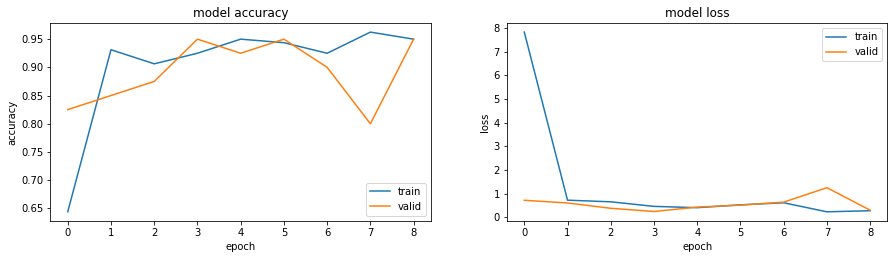

40/40 [==============================] - 2s 39ms/step - loss: 0.5253 - accuracy: 0.9250


In [ ]:
learning_with_given_data()

In [ ]:
# subtask 2.2

import shutil, random, os
base_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining and Visualization/Assessment_1_task_2/with_synthetic_data/'
covid_dirpath = base_path + 'Covid-19'    # original 100 Covid-19 images
synthetic_images = base_path + 'images-covid'   # 50 generated images
dest_directory = base_path + 'test2/covid'   # destination where combined images will be kept

filenames = random.sample(os.listdir(covid_dirpath), 50)

for fname in filenames:
  shutil.copy(os.path.join(covid_dirpath, fname), dest_directory)

f_names = os.listdir(synthetic_images)
for f in f_names:
    shutil.copy(os.path.join(synthetic_images, f), dest_directory)

print(len(os.listdir(dest_directory)))

100


In [ ]:
def learning_with_synthetic_data():
  learning_function(base_path + 'test2')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________
Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/20
16/16 [==============================] - 45s 3s/step - loss: 6.0801 - accuracy: 0.7132 - val_loss: 0.0974 - val_accuracy: 0.9500
Epoch 2/20
16

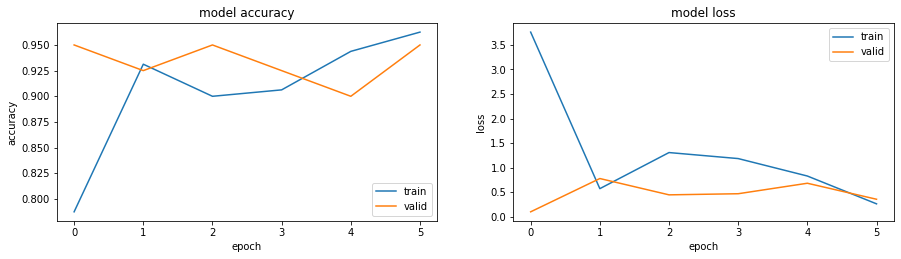

40/40 [==============================] - 1s 31ms/step - loss: 0.3552 - accuracy: 0.9500


In [ ]:
learning_with_synthetic_data()